In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import library.timedomain as td
import library.fileprocessing as fp
import glob,sys
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time

c = 299792458

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

# Process One Multisweep file

In [ ]:
#Process one multisweep file

F = fp.loadfile_frequency('../../phase_work/frequency.txt')
timestamps,phase_data = fp.loadfile_multisweep('../../phase_work/08-45-36.510483.txt')

delay1 = np.empty(0) 
delay2 = np.empty(0)
for data in phase_data:
    temp_delay1,temp_delay2,temp1,temp2 = td.transform(F,data,overs=1000)
    delay1 = np.append(delay1,temp_delay1)
    delay2 = np.append(delay2,temp_delay2)

# Process File with Reduced data
    
    

In [4]:
cd phase_work/Exp7/

C:\Users\Roufurd\Documents\python_work\phase_work\Exp7


In [5]:
oversampling = 1000
#cd ../../phase_work/Exp7/

In [6]:
#Process Reduced data results file

timestamps = np.empty(0)
delay1 = np.empty(0)
delay2 = np.empty(0)
height1 = np.empty(0)
height2 = np.empty(0)
data = np.loadtxt('Exp7_data_1000oversampling.csv',dtype='float',delimiter=',',skiprows=1)
timestamps = data[:,0];delay1 = data[:,1];height1 = data[:,2];delay2 = data[:,3];height2 = data[:,4]
timestamps_offset = timestamps - min(timestamps)

ValueError: x and y must have same first dimension

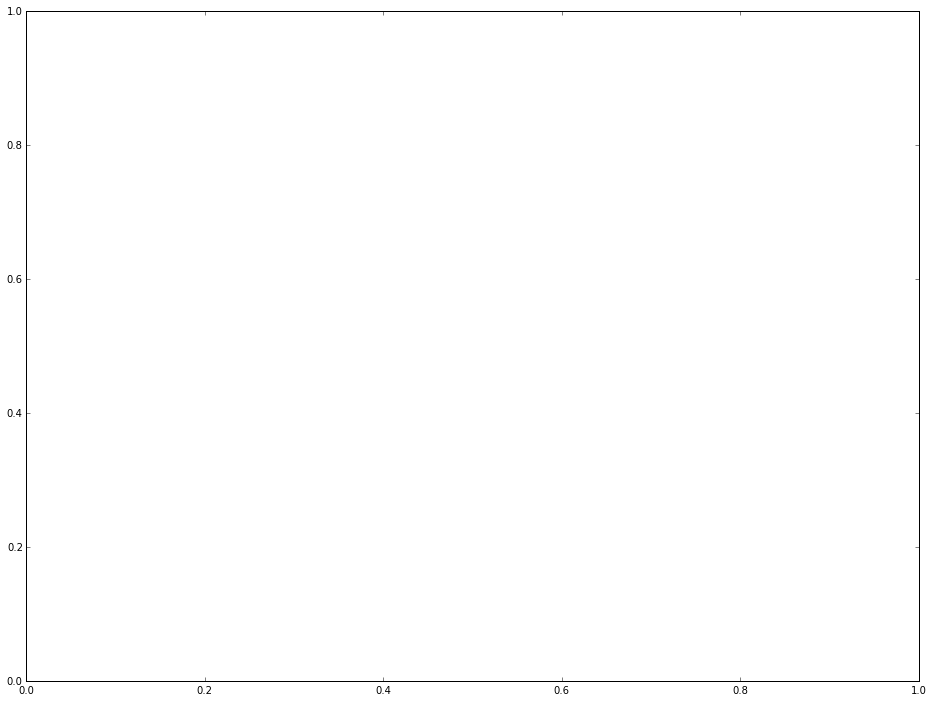

In [15]:
#zoomed_slice = slice(1500,)
offset_temp = 1500
plt.figure(figsize=(16,12))
plt.plot(timestamps_offset[offset_temp:],delay1[offset_temp:],'b')
plt.grid(True)

In [ ]:
#Determine indices where amplitude heights of pulses swopped position and make those points equal to mean delay
#This is an artifact of the peak detection code. 
#Peak detection code algorithm uses pulse amplitude to determine first and second peaks

temp_delay1 = np.copy(delay1)
temp_delay2 = np.copy(delay2)
indices = []
counter = 0
threshold = 0.01
for i in range(len(delay2)-1):
    if np.abs(delay2[i+1]-delay2[i]) > threshold:
        indices.append(i)
        counter+=1        
print counter
temp_delay1[indices] = np.mean(delay1) 
temp_delay2[indices] = np.mean(delay2) 

In [11]:
#If no re-ordering is required, offset from TIME=0 can be inserted if needed
offset = 1500
temp_delay1 = np.copy(delay1)[offset:]
temp_delay2 = np.copy(delay2)[offset:]
timestamps_offset = np.copy(timestamps_offset)[offset:]
timestamps = np.copy(timestamps)[offset:]
temp_height1 = np.copy(height1)[offset:]
temp_height2 = np.copy(height2)[offset:]


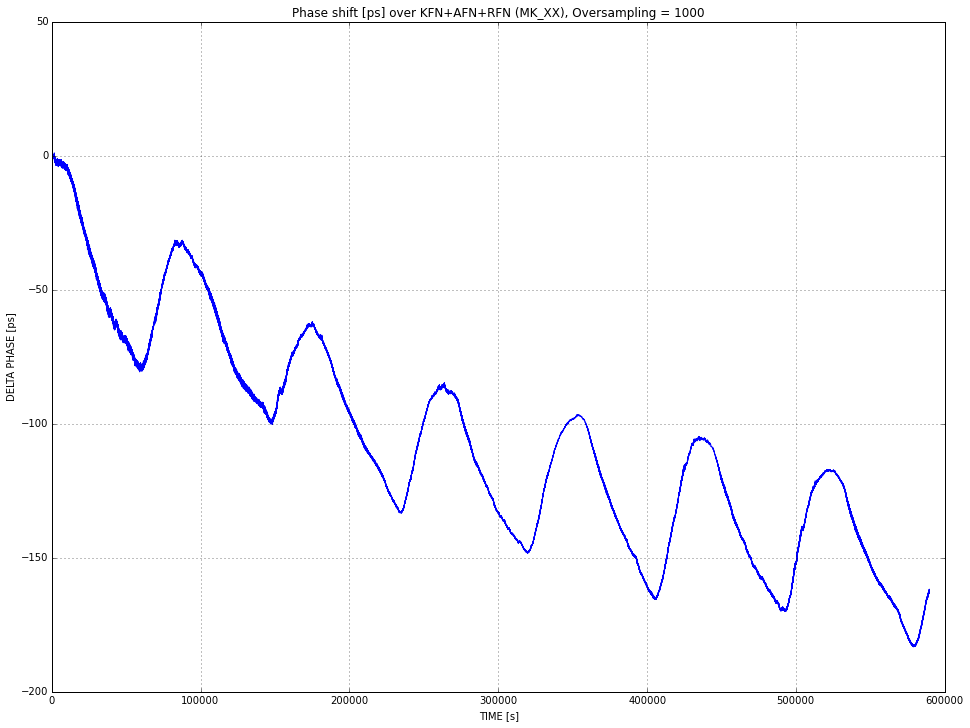

In [25]:
#Plot Delta delay of First peak of data
#This is with data where few out of order peaks were rearranged

delta_delay1 = 0.5*(temp_delay1-temp_delay1[0])/c*1e12
plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,delta_delay1,'b')
plt.title('Phase shift [ps] over KFN+AFN+RFN (MK_XX), Oversampling = %i' % oversampling)
plt.xlabel('TIME [s]'); plt.ylabel('DELTA PHASE [ps]')
plt.grid(True)

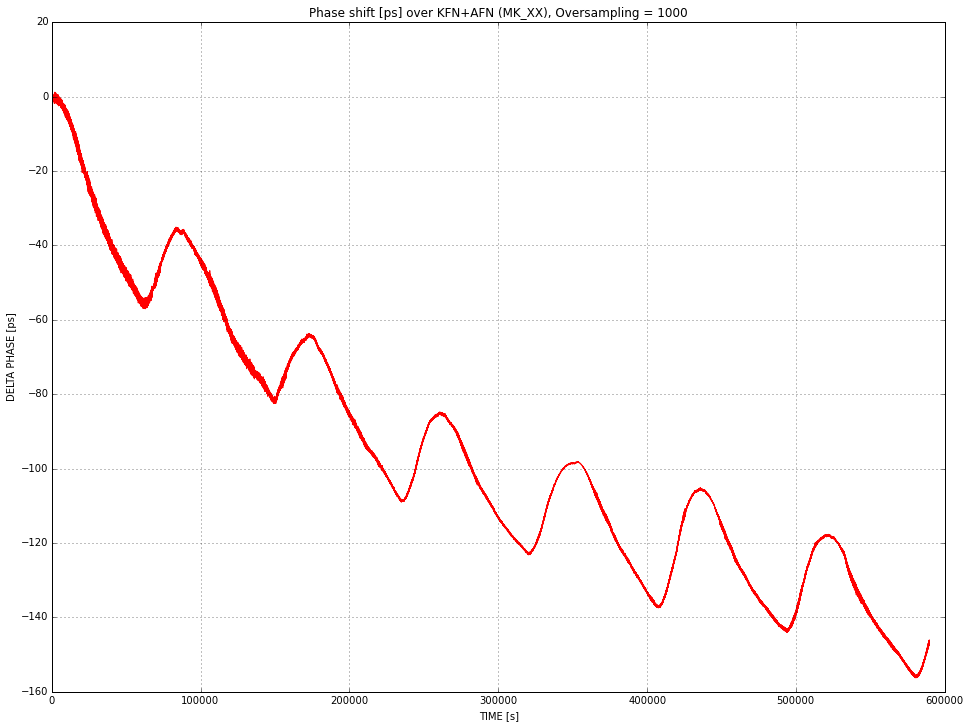

In [29]:
#Plot Delta delay of Second peak
#This is with data where few out of order peaks were rearranged
delta_delay2 = 0.5*(temp_delay2-temp_delay2[0])/c*1e12
plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,delta_delay2,'r')
plt.title('Phase shift [ps] over KFN+AFN (MK_XX), Oversampling = %i' % oversampling)
plt.xlabel('TIME [s]'); plt.ylabel('DELTA PHASE [ps]')
plt.grid(True)

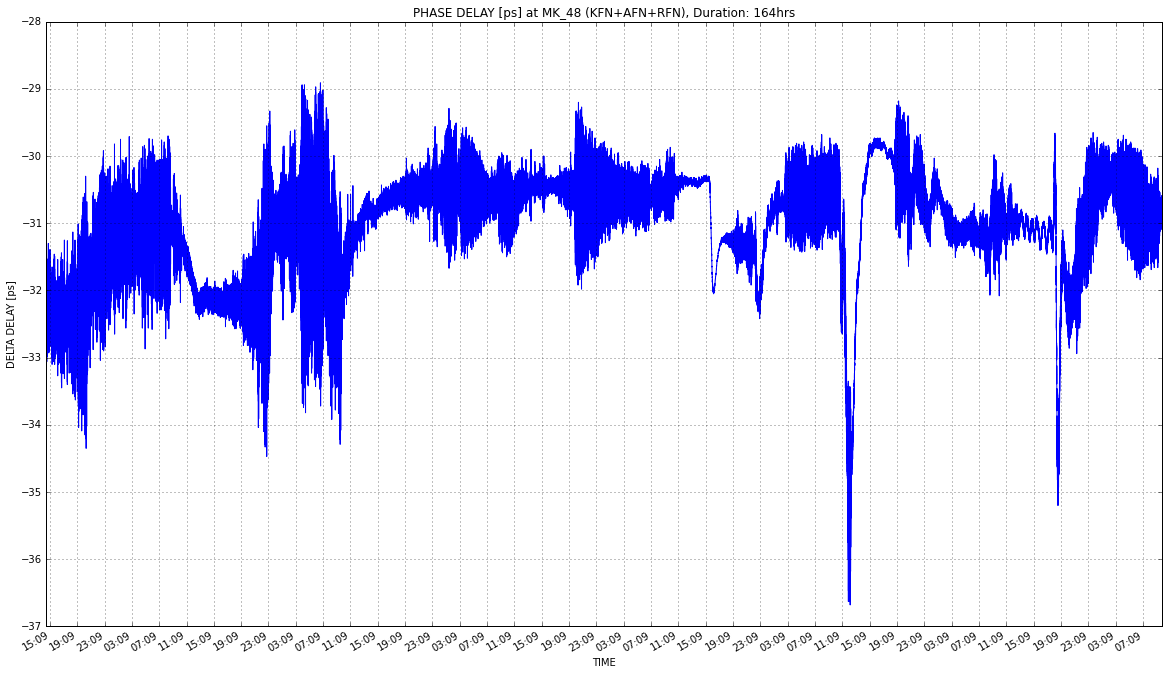

In [32]:
# Plot Amplitude of First peak
temp_timestamps = [datetime.fromtimestamp(seconds) for seconds in timestamps]

plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=60*4))
plt.plot(mdates.date2num(temp_timestamps),temp_height1,'b')
plt.title('PHASE DELAY [ps] at MK_XX (KFN+AFN+RFN), Duration: %0.0fhrs' % float(timestamps_offset[-1]/3600.0))
plt.xlabel('TIME'); plt.ylabel('DELTA DELAY [ps]')
plt.gcf().autofmt_xdate()
plt.grid(True)

In [ ]:
zoomed_slice = slice(210081,286472)
plt.figure(figsize=(16,12))
#plt.subplot(2,1,1)
#plt.grid(True)
#plt.title('Exp7 Delay [ps] over %0.f hrs , Oversampling = %i' % (((timestamps_offset[zoomed_slice])[-1]-(timestamps_offset[zoomed_slice])[0])/3600,oversampling))
#plt.plot(timestamps_offset[zoomed_slice],temp_delay2[zoomed_slice],'r')
#plt.subplot(2,1,2)
plt.grid(True)
plt.title('Exp7 Amplitude [dB] over %0.f hrs' % (((timestamps_offset[zoomed_slice])[-1]-(timestamps_offset[zoomed_slice])[0])/3600))
plt.plot(timestamps_offset[zoomed_slice],temp_height1[zoomed_slice],'g')
plt.figure(figsize=(16,12))


In [20]:
temp_index = np.where(timestamps_offset.astype(int)==(300000-22*3600))
print temp_index

(array([210081], dtype=int64),)


#Phase gradient

In [ ]:
time.time?

In [ ]:
time_start = time.time()
delay = delta_delay2

samplerate = timestamps_offset[1]-timestamps_offset[0]   #rough samplerate
samples20min = int(20*60/samplerate)    #number of samples in 20 minutes
stability = np.empty(0)
stability_timestamps = np.empty(0)

#phase delta in 20 minutes calculation
for i in range(len(delay)-samples20min):
    temp_max = np.max(delay[i:i+samples20min])
    temp_min = np.min(delay[i:i+samples20min])
    stability = np.append(stability,temp_max-temp_min)
    stability_timestamps = np.append(stability_timestamps,timestamps[i])
print (time.time()-time_start)

In [ ]:
temp_timestamps = [datetime.fromtimestamp(seconds) for seconds in stability_timestamps]
temp_stability_timestamps = [datetime.fromtimestamp(seconds) for seconds in stability_timestamps]
x_limits = np.ones(len(stability))*2.37
l_limits = np.ones(len(stability))*9.45

plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=60*4))
plt.plot(mdates.date2num(temp_timestamps),delay1_stability20minutes,'b',mdates.date2num(temp_timestamps),x_limits,'r-',mdates.date2num(temp_timestamps),l_limits,'r-')
plt.title('STABILITY FOR EVERY 20 minute INTERVAL, MAX-MIN in every 20 minute slot, OFN, Oversampling = %i' % oversampling)
#plt.title('STABILITY FOR EVERY 20 minute INTERVAL, %0.0fs MOVING AVERAGE' % (moving_average_window*samplerate))
plt.xlabel('TIME [s]'); plt.ylabel('DELTA PHASE IN 20 minutes [ps]')
plt.gcf().autofmt_xdate()
plt.grid(True)

In [ ]:
delay1_stability20minutes = np.copy(stability)

In [ ]:
delay2_stability20minutes = np.copy(stability)

In [ ]:
#IF wanting to detect the difference from the start and end of window (not MAX - MIN in window)
delay = delta_delay1
moving_average_window = 100

samplerate = timestamps_offset[1]-timestamps_offset[0]   #rough samplerate
samples20min = int(20*60/samplerate)    #number of samples in 20 minutes
stability = np.empty(0)
stability_timestamps = np.empty(0)

#phase delta in 20 minutes calculation
for i in range(samples20min,len(delay)):
    stability = np.append(stability,delay[i]-delay[i-samples20min])
    stability_timestamps = np.append(stability_timestamps,timestamps[i])
    
#Plot Amplitude of First peak
#moving average applied
moving_average_window = 100
temp_timestamps = [datetime.fromtimestamp(seconds) for seconds in stability_timestamps]
temp_stability_timestamps = [datetime.fromtimestamp(seconds) for seconds in stability_timestamps]

plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=60*4))
plt.plot(mdates.date2num(temp_timestamps),stability,'b',mdates.date2num(temp_stability_timestamps[:-(moving_average_window-1)]),movingaverage(stability,moving_average_window),'r')
plt.title('STABILITY FOR EVERY 20 minute INTERVAL, %0.0fs MOVING AVERAGE, Oversampling = %i' % (moving_average_window*samplerate,oversampling))
plt.xlabel('TIME [s]'); plt.ylabel('DELTA PHASE IN 20 minutes [ps]')
plt.gcf().autofmt_xdate()
plt.grid(True)